In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pylab as plt

from modules.utils import load_cifar10, load_cifar100
from modules.cnn_with_spectral_pooling import CNN_Spectral_Pool

% matplotlib inline
% load_ext autoreload
% autoreload 2

In [2]:
xtrain, ytrain, xtest, ytest = load_cifar100(get_test_data=True, channels_last=False)

file already downloaded..


In [3]:
xtrain.shape, ytrain.shape, xtest.shape, ytest.shape

((50000, 3, 32, 32), (50000,), (10000, 3, 32, 32), (10000,))

In [4]:
# # take a small batch for testing architecture
sample_size = 128
sampleind = np.random.choice(np.arange(xtrain.shape[0]),
                             size=sample_size, replace=False)
xtrain_sample = xtrain[sampleind]
ytrain_sample = ytrain[sampleind]
assert len(np.unique(ytrain_sample)) >= 30
xtrain_sample.shape


(128, 3, 32, 32)

## test build graph:

In [7]:
from modules.cnn_with_spectral_pooling import CNN_Spectral_Pool
validation_size = 1024

cnn = CNN_Spectral_Pool(M=11,
                        verbose=True,
                        learning_rate=1e-3,
                        l2_norm=0.001,
                        lr_reduction_factor=0.5,
                        lr_reduction_epochs=[11,41,61,81,101,121,141],
                        gamma=0.85)


In [ ]:
tf.reset_default_graph()
testing_command = """
cnn.train(xtrain_sample,
          ytrain_sample,
          xtrain_sample,
          ytrain_sample,
          batch_size=np.minimum(8, len(xtrain_sample)),
          epochs=150,
          extra_conv_layer=True,
          use_global_averaging=False,
)
# """
# training_command="""
cnn.train(xtrain[:-validation_size],
          ytrain[:-validation_size],
          xtrain[-validation_size:],
          ytrain[-validation_size:],
          batch_size=64,
          epochs=150,
          extra_conv_layer=True,
          use_global_averaging=True,
)
# """

Building tf graph...
Adding conv layer 1 | Input size: 32 | Input channels: 3 | #filters: 128 | filter size: 3
Adding spectral pool layer 1 | Input size: 32 | filter size: (27,27) | Freq Dropout Bounds: (4.00909090909091,14.0)
Adding conv layer 2 | Input size: 27 | Input channels: 128 | #filters: 160 | filter size: 3
Adding spectral pool layer 2 | Input size: 27 | filter size: (22,22) | Freq Dropout Bounds: (3.2727272727272725,12.0)
Adding conv layer 3 | Input size: 22 | Input channels: 160 | #filters: 192 | filter size: 3
Adding spectral pool layer 3 | Input size: 22 | filter size: (18,18) | Freq Dropout Bounds: (2.590909090909091,10.0)
Adding conv layer 4 | Input size: 18 | Input channels: 192 | #filters: 224 | filter size: 3
Adding spectral pool layer 4 | Input size: 18 | filter size: (15,15) | Freq Dropout Bounds: (1.9636363636363636,8.0)
Adding conv layer 5 | Input size: 15 | Input channels: 224 | #filters: 256 | filter size: 3
Adding spectral pool layer 5 | Input size: 15 | filte

__Note:__ in the above output, train acc is not same as validation acc even though they are the same because of dropout applied in train and not in validation

In [6]:
tf.reset_default_graph()
cnn.calc_test_accuracy(xtest, ytest, 'test/test_1513402208.8499193')

Building tf graph...
Adding conv layer 1 | Input size: 32 | Input channels: 3 | #filters: 128 | filter size: 3
Adding spectral pool layer 1 | Input size: 32 | filter size: (27,27) | Freq Dropout Bounds: (4.00909090909091,14.0)
Adding conv layer 2 | Input size: 27 | Input channels: 128 | #filters: 160 | filter size: 3
Adding spectral pool layer 2 | Input size: 27 | filter size: (22,22) | Freq Dropout Bounds: (3.2727272727272725,12.0)
Adding conv layer 3 | Input size: 22 | Input channels: 160 | #filters: 192 | filter size: 3
Adding spectral pool layer 3 | Input size: 22 | filter size: (18,18) | Freq Dropout Bounds: (2.590909090909091,10.0)
Adding conv layer 4 | Input size: 18 | Input channels: 192 | #filters: 224 | filter size: 3
Adding spectral pool layer 4 | Input size: 18 | filter size: (15,15) | Freq Dropout Bounds: (1.9636363636363636,8.0)
Adding conv layer 5 | Input size: 15 | Input channels: 224 | #filters: 256 | filter size: 3
Adding spectral pool layer 5 | Input size: 15 | filte

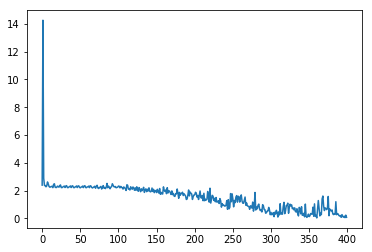

In [26]:
plt.plot(cnn.train_loss)

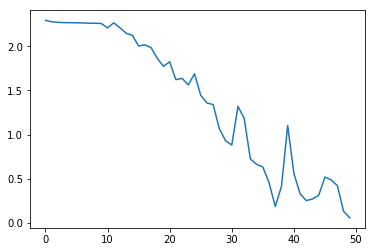

In [27]:
plt.plot(cnn.val_loss)

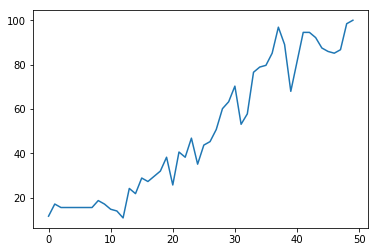

In [28]:
plt.plot(cnn.val_accuracy)

In [54]:
# show the graph
from modules.utils import show_graph 
tf.reset_default_graph()
with tf.Session() as sess:
    saver = tf.train.import_meta_graph('model/test.meta')
    graph = tf.get_default_graph()
    show_graph(graph)

In [18]:
c

2

In [36]:
x = np.reshape(np.arange(120, dtype=np.float32), (5,4,3,2))

In [37]:
x

array([[[[   0.,    1.],
         [   2.,    3.],
         [   4.,    5.]],

        [[   6.,    7.],
         [   8.,    9.],
         [  10.,   11.]],

        [[  12.,   13.],
         [  14.,   15.],
         [  16.,   17.]],

        [[  18.,   19.],
         [  20.,   21.],
         [  22.,   23.]]],


       [[[  24.,   25.],
         [  26.,   27.],
         [  28.,   29.]],

        [[  30.,   31.],
         [  32.,   33.],
         [  34.,   35.]],

        [[  36.,   37.],
         [  38.,   39.],
         [  40.,   41.]],

        [[  42.,   43.],
         [  44.,   45.],
         [  46.,   47.]]],


       [[[  48.,   49.],
         [  50.,   51.],
         [  52.,   53.]],

        [[  54.,   55.],
         [  56.,   57.],
         [  58.,   59.]],

        [[  60.,   61.],
         [  62.,   63.],
         [  64.,   65.]],

        [[  66.,   67.],
         [  68.,   69.],
         [  70.,   71.]]],


       [[[  72.,   73.],
         [  74.,   75.],
         [  76.,   7

In [38]:
with tf.Session() as sess:
    print(sess.run(tf.reduce_mean(tf.constant(x), axis=(2,3))))

[[   2.5    8.5   14.5   20.5]
 [  26.5   32.5   38.5   44.5]
 [  50.5   56.5   62.5   68.5]
 [  74.5   80.5   86.5   92.5]
 [  98.5  104.5  110.5  116.5]]


In [31]:
x.shape

(8, 2, 2, 2)